In [53]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [54]:
from PIL import Image
from IPython.display import display
import math

In [55]:
path = "/workspace/Data/Lena.jpeg" # Your image path 
img = Image.open(path)

In [56]:
def IncreaseResReplicate(img, increaseRatio):
    width, height=img.size
    newimg = Image.new("RGB", (width, height), "black")
    for column_counter in range(0, width):
        for row_counter in range(0, height):
            current_pixel=img.getpixel((column_counter, row_counter))
            newimg.putpixel((column_counter,row_counter),current_pixel)   
    return newimg

def IncreaseResSH(img, increaseRatio):
    width, height=img.size
    newimg = Image.new("RGB", ((width-1)*increaseRatio+1, (height-1)*increaseRatio+1), "black")
    for column_counter in range(0, width-1):
        for row_counter in range(0, height-1):
            c_pixel=img.getpixel((column_counter, row_counter))
            r_pixel=img.getpixel((column_counter+1, row_counter))
            d_pixel=img.getpixel((column_counter, row_counter+1))
            for column_counter_sub_image in range(0, increaseRatio):
                for row_counter_sub_image in range(0, increaseRatio):
                    new_img_column=(column_counter*increaseRatio)+column_counter_sub_image
                    new_img_row=(row_counter*increaseRatio)+row_counter_sub_image
                    new_pixel=c_pixel
                    newimg.putpixel((new_img_column,new_img_row),new_pixel)    
    return newimg

def IncreaseResLinearInterpolation(img, increaseRatio):
    width, height=img.size
    newimg = Image.new("RGB", ((width-1)*increaseRatio+1, (height-1)*increaseRatio+1), "black")
    for column_counter in range(0, width-1):
        for row_counter in range(0, height-1):
            c_pixel=img.getpixel((column_counter, row_counter))
            r_pixel=img.getpixel((column_counter+1, row_counter))
            d_pixel=img.getpixel((column_counter, row_counter+1))
            for column_counter_sub_image in range(0, increaseRatio):
                for row_counter_sub_image in range(0, increaseRatio):
                    new_img_column=(column_counter*increaseRatio)+column_counter_sub_image
                    new_img_row=(row_counter*increaseRatio)+row_counter_sub_image
                    new_pixel=c_pixel
                    newimg.putpixel((new_img_column,new_img_row),new_pixel)  
    return newimg

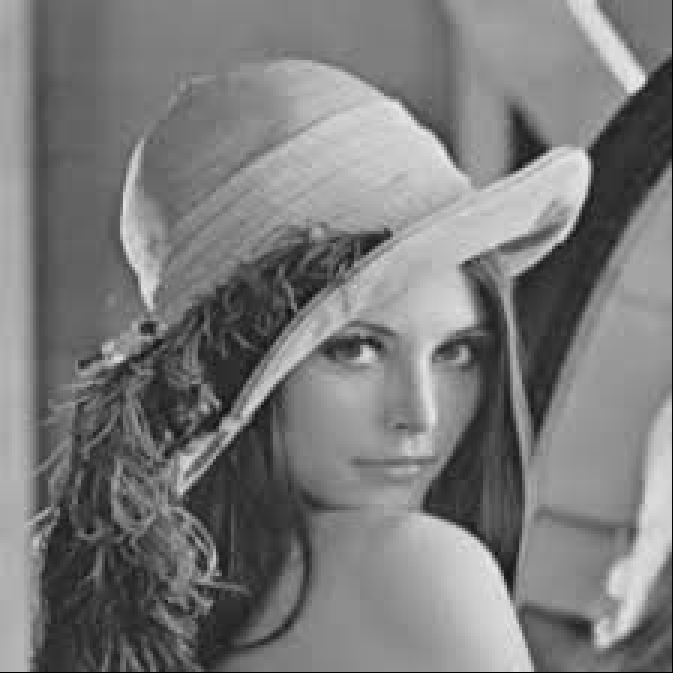

In [57]:
newimg=IncreaseResLinearInterpolation(img, 3)
display(newimg)

In [120]:
def padImageSH(img):
    width, height=img.size
    newimg = Image.new("RGB", (width+2, height+2), "black")

    Image.Image.paste(newimg, img, (1, 1))

    # pad up
    newimg.putpixel((0,0),img.getpixel((0, 0)))
    for column_counter in range(0, width):
            current_pixel=img.getpixel((column_counter, 0))
            newimg.putpixel((column_counter+1,0),current_pixel) 
    
    # pad right
    newimg.putpixel((width+1, 0),img.getpixel((width-1, 0)))
    for row_counter in range(0, height):
            current_pixel=img.getpixel((width-1, row_counter))
            newimg.putpixel((width+1,row_counter+1),current_pixel)

    # pad down
    newimg.putpixel((width+1,height+1),img.getpixel((width-1, height-1)))
    for column_counter in range(0, width):
            current_pixel=img.getpixel((column_counter, height-1))
            newimg.putpixel((column_counter+1,height+1),current_pixel)

    # pad left
    newimg.putpixel((0, height+1),img.getpixel((0, height-1)))
    for row_counter in range(0, height):
            current_pixel=img.getpixel((0, row_counter))
            newimg.putpixel((0,row_counter+1),current_pixel)
    new_img = newimg.resize((1000, 1000))
        
    return new_img

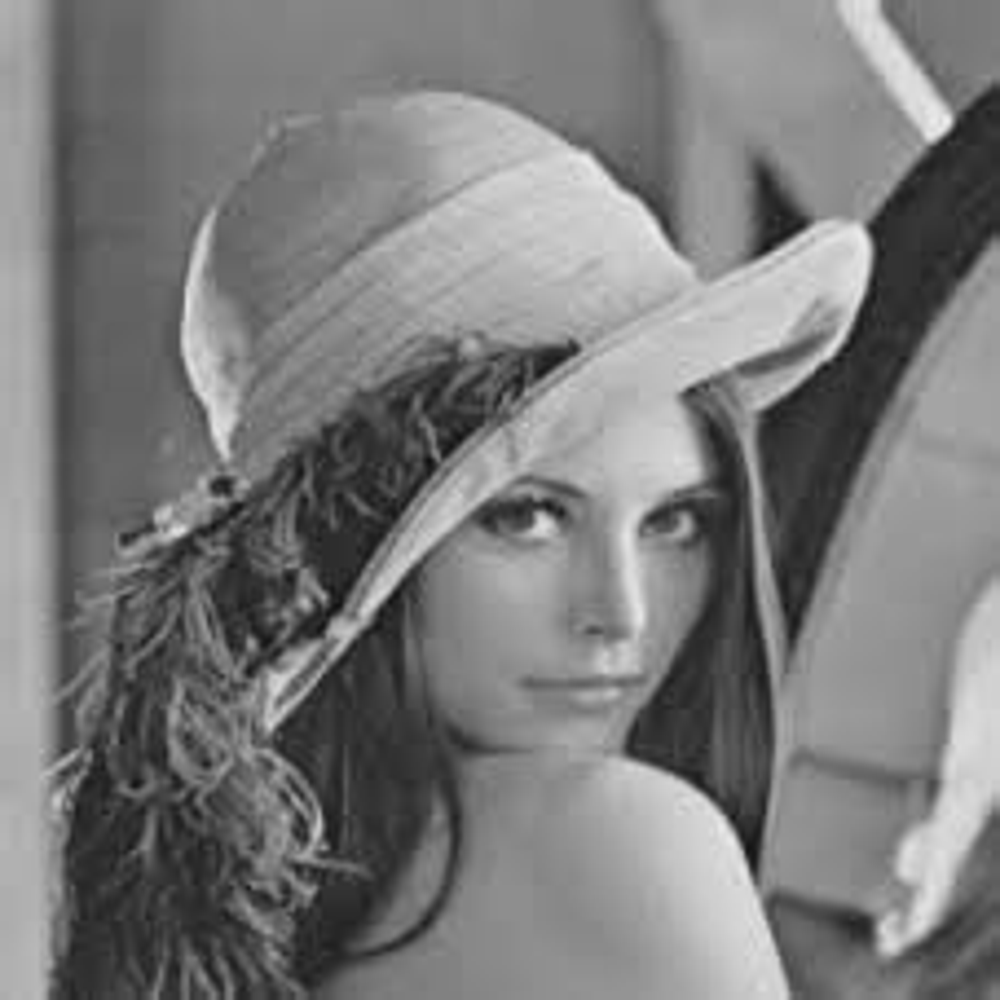

In [121]:
padImageSH(img)

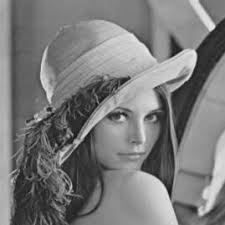

In [13]:
display(img)
width, height=img.size
current_pixel=img.getpixel((width-1, height-1))